# Theoretical Foundations of Machine Learning Final Project 

1.Youseef Osama Ahmed <br>
2.Mohammad Alameen Abdilaziz <br>
3.Osama Khaled Abd-elghaffar <br>
4.Mahmoud Amr Mahmoud <br>
5.Amira Ali Elsayed <br> 


In [1]:
import numpy as np

# Loading the data
Using the keras datasets to load the data, the data is already splitted into train and test portions.
We are just going to take a portion of the train set and make it our validation set

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


# Exploring the Data

(<matplotlib.image.AxesImage at 0x7f9997d5b790>, array([9], dtype=uint8))

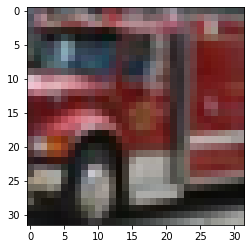

In [3]:
import matplotlib.pyplot as plt
index = 88
plt.imshow(X_train[index]), y_train[index]

some image are too bad even a human being can't recognize it given the following image which is suppose to be for a **Deer**

(<matplotlib.image.AxesImage at 0x7f9997845890>, array([4], dtype=uint8))

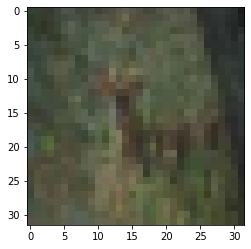

In [4]:
plt.imshow(X_train[10]), y_train[10]

In [5]:
labels = {0:  'airplane',   #back to the documntation
          1:  'automobile',
          2:  'bird', 
          3:  'cat', 
          4:  'deer', 
          5:  'dog', 
          6:  'frog', 
          7:  'horse', 
          8:  'ship', 
          9:  'truck'}


In [6]:
unique, counts = np.unique(y_train, return_counts=True) #all the classes equal to each other
dict(zip(unique, counts))

{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

# Data Preprocessing

In [7]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

## Avg Pooling

 looking at the first image at the first pixel (0, 0) coordinates,at each pixel we got three RGB values and we are going to replace them by a single value computed by their avreage.

In [8]:
def avg_pixels(data):
  data_avg = data.copy()
  for i in range(len(data)): #looping over the data
    for x in range(len(data[0])): #looping over the x_coordinates
      for y in range(len(data[0].T[0])): #looping over the y_coordinates
        data_avg[i][x][y] = np.average(data[i][x][y])
  return data_avg

In [9]:
X_train_avg = avg_pixels(X_train)

In [10]:
len(X_train_avg) #for debugging

50000

After Averging the images there is no change, they are only converted into gray images like the following examples

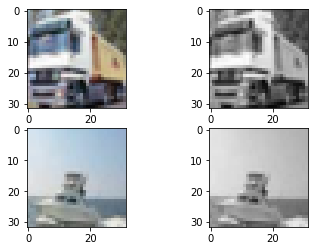

In [11]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(X_train[1])
axarr[0,1].imshow(X_train_avg[1])
axarr[1,0].imshow(X_train[100])
axarr[1,1].imshow(X_train_avg[100])

Since now all the RGB channels got the same value no need to keep them all, instead we are going to keep only a single chanel, converting each image into a 32x32 matrix, which will provide an efficient way in computation      
ex. the first pixel of the first image will get the values (61, 61, 61) so  we will make it one channel (61)

In [12]:
X_train_avg[0][0][0]

array([61, 61, 61], dtype=uint8)

In [13]:
def convert(data):
  X_train_avg = avg_pixels(data)
  imgs = []
  for i in range(len(data)):
    img = []
    for j in range(len(data[0])):
      tmp = [int(np.unique(hold)[0]) for hold in X_train_avg[i][j]]
      img.append(tmp)
    imgs.append(img)
  return np.asarray(imgs)

In [14]:
X_train_conv = convert(X_train)

In [15]:
len(X_train_conv)

50000

a sample for converted image into 32 * 32 

In [16]:
max(X_train_conv[0].flatten()) * 29791

7328586

## Applying the momentum 

In [17]:
def c_momentum(data, c = 3):
  m_data = []
  mean_x = (len(data[0][0]) + 1) / 2
  mean_y = (len(data[0][0].T) + 1) / 2
  for img in data:
    ms = []
    for p in range(c+1):
      for q in range(c+1):
        if p + q <= c:
          tmp = np.multiply((np.power(np.arange(len(data[0][0])) - mean_x, p) * np.power(np.arange(len(data[0].T[0] - mean_y)), q)) , img)
          ms.append(tmp.sum().sum())
    m_data.append(ms)
  return np.asarray(m_data)

In [18]:
X_train_m = c_momentum(X_train_conv, c  = 3)

In [19]:
len(X_train_m[0])

10

In [20]:
len(X_train_m)

50000

In [21]:
X_train_m[0]

array([ 1.05589000e+05,  1.63695100e+06,  3.37076310e+07,  7.79918347e+08,
       -1.05267500e+05,  6.69793950e+06,  2.23742436e+08,  8.43485325e+06,
        1.13226434e+08, -2.59486449e+07])

## Spliting the train data into train and validation by 10%

In [22]:
from sklearn.model_selection import train_test_split
X_trainn, X_val, y_trainn, y_val = train_test_split(X_train_m, y_train, test_size=0.1)

In [23]:
len(X_trainn), len(X_val)

(45000, 5000)

# Building the Model


As we can see below many diffrient models with diffrient hyperparamters couldn't catch the complexity of the model even the SVMs with rbf and polynomial kernal. this might be due to many resons


*   Quality of the data, data doesn't have enough information
*   simplicity of the models, even tuning the hyper-parapmeters won't add that much
*   increasing the number of the instances will not add to much, models are too simple 


*   CNN as we see below are a much more complex model enabling them to detect patterns, edges, ..etc, perform much better





## SVM

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [25]:
svc1 = SVC()
svc1.fit(X_trainn, y_trainn.ravel())
svc2 = SVC(kernel='poly', degree=3)
svc2.fit(X_trainn, y_trainn.ravel())
svc3 = SVC(kernel='sigmoid', gamma='auto')
svc3.fit(X_trainn, y_trainn.ravel())

SVC(gamma='auto', kernel='sigmoid')

In [26]:
print(accuracy_score(svc1.predict(X_val), y_val))
print(accuracy_score(svc2.predict(X_val), y_val))
print(accuracy_score(svc2.predict(X_val), y_val))

0.1738
0.1474
0.1474


##Random Forest


In [51]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
forest1 = RandomForestClassifier(criterion='entropy', max_depth=50)
forest1.fit(X_trainn, y_trainn.ravel())
forest2 = RandomForestClassifier(criterion='gini', max_depth=70)
forest2.fit(X_trainn, y_trainn.ravel())
forest3 = RandomForestClassifier(criterion='entropy', max_depth=100)
forest3.fit(X_trainn, y_trainn.ravel())

RandomForestClassifier(criterion='entropy', max_depth=100)

In [50]:
print(accuracy_score(forest1.predict(X_val), y_val))
print(accuracy_score(forest2.predict(X_val), y_val))
print(accuracy_score(forest3.predict(X_val), y_val))

0.1722
0.1694
0.174


##Decision Tree


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=100)
tree1.fit(X_trainn, y_trainn.ravel())
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=150)
tree2.fit(X_trainn, y_trainn.ravel())
tree3 = DecisionTreeClassifier(criterion='gini', max_depth=200)
tree3.fit(X_trainn, y_trainn.ravel())

DecisionTreeClassifier(max_depth=200)

In [32]:
print(accuracy_score(tree1.predict(X_val), y_val))
print(accuracy_score(tree2.predict(X_val), y_val))
print(accuracy_score(tree3.predict(X_val), y_val))

0.1334
0.134
0.139


##KNN


In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn1 = KNeighborsClassifier(n_neighbors=4)
knn1.fit(X_trainn, y_trainn.ravel())
knn2 = KNeighborsClassifier(n_neighbors=6)
knn2.fit(X_trainn, y_trainn.ravel())
knn3 = KNeighborsClassifier(n_neighbors=8)
knn3.fit(X_trainn, y_trainn.ravel())

KNeighborsClassifier(n_neighbors=8)

In [35]:
print(accuracy_score(knn1.predict(X_val), y_val))
print(accuracy_score(knn2.predict(X_val), y_val))
print(accuracy_score(knn3.predict(X_val), y_val))

0.142
0.1584
0.1612


## ANN

In [36]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import models, layers

In [37]:
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(len(X_trainn[0]),)))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [38]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
 dense_3 (Dense)             (None, 10)                40        
                                                                 
Total params: 134
Trainable params: 134
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(X_trainn, y_trainn, epochs=10, 
                    validation_data=(X_val, y_val))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1407/1407 [==============================] - 2s 1ms/step - loss: 26.6909 - accuracy: 0.0961 - val_loss: 35.7303 - val_accuracy: 0.0924
Epoch 2/10
1407/1407 [==============================] - 2s 1ms/step - loss: 5.0456 - accuracy: 0.0991 - val_loss: 12.3827 - val_accuracy: 0.1010
Epoch 3/10
1407/1407 [==============================] - 2s 1ms/step - loss: 3.9109 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.0924
Epoch 4/10
1407/1407 [==============================] - 2s 1ms/step - loss: 2.3573 - accuracy: 0.0981 - val_loss: 2.3031 - val_accuracy: 0.0924
Epoch 5/10
1407/1407 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1016
Epoch 6/10
1407/1407 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.0982
Epoch 7/10
1407/1407 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3029 - val_accuracy: 0.0982


CNN on the normal data

In [41]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [42]:
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10))

In [43]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [44]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model2.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.9385 - accuracy: 0.3407 - val_loss: 1.5169 - val_accuracy: 0.4356
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.4276 - accuracy: 0.4868 - val_loss: 1.4158 - val_accuracy: 0.5091
Epoch 3/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.2560 - accuracy: 0.5516 - val_loss: 1.2147 - val_accuracy: 0.5664
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1488 - accuracy: 0.5966 - val_loss: 1.1514 - val_accuracy: 0.5989
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0554 - accuracy: 0.6330 - val_loss: 1.1817 - val_accuracy: 0.5911
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9793 - accuracy: 0.6587 - val_loss: 1.0682 - val_accuracy: 0.6389
Epoch 7/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9167 - accuracy: 0.6802 - val_loss: 1.0581 -

313/313 - 3s - loss: 1.0863 - accuracy: 0.6545 - 3s/epoch - 9ms/step


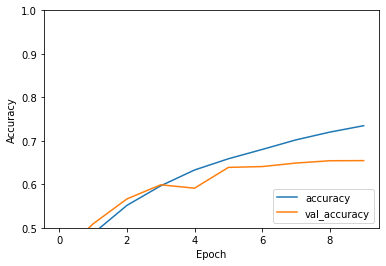

In [45]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(X_test,  y_test, verbose=2)


# Error Analysis

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [47]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

-----------------Convolutional Neural Network Report---------------
F1 score: 0.651522894478142
Accuracy score: 0.6545
Confusion matrix: 
 [[611  36  67  23  29   7  14  21 165  27]
 [ 17 824   7   6   7   9   7   5  46  72]
 [ 59   8 509  82 125  66  52  61  28  10]
 [ 15  14  67 444 102 143  75  62  56  22]
 [ 16   8  69  70 612  29  53 115  25   3]
 [ 13   3  70 174  48 516  27 112  26  11]
 [  4  11  55  92  57  15 721  15  19  11]
 [ 11   3  34  27  70  62   8 760  12  13]
 [ 49  42  11  10  12   6   4   4 852  10]
 [ 29 116  11  13   8   6   7  32  82 696]]
Plotting confusion matrix


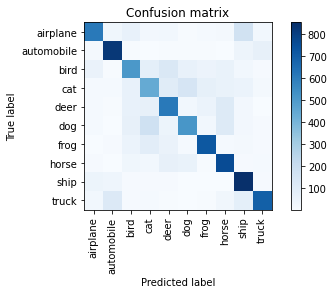

              precision    recall  f1-score   support

           0       0.74      0.61      0.67      1000
           1       0.77      0.82      0.80      1000
           2       0.57      0.51      0.54      1000
           3       0.47      0.44      0.46      1000
           4       0.57      0.61      0.59      1000
           5       0.60      0.52      0.56      1000
           6       0.74      0.72      0.73      1000
           7       0.64      0.76      0.70      1000
           8       0.65      0.85      0.74      1000
           9       0.80      0.70      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



In [53]:
cnn_pred = model2.predict(X_test)
cnn_pred = np.argmax(cnn_pred,axis=1)

cnn_f1 = metrics.f1_score(y_test, cnn_pred, average= "weighted")
cnn_accuracy= metrics.accuracy_score(y_test, cnn_pred)
cnn_cm = metrics.confusion_matrix(y_test, cnn_pred)
print("-----------------Convolutional Neural Network Report---------------")
print("F1 score: {}".format(cnn_f1))
print("Accuracy score: {}".format(cnn_accuracy))
print("Confusion matrix: \n", cnn_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cnn_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, cnn_pred))

In [54]:
X_test_transformed = convert(X_test)
X_test_m = c_momentum(X_test_transformed, c  = 3)
y_test = y_test.ravel()

-----------------SVM Report---------------
F1 score: 0.15671022335745674
Accuracy score: 0.1853
Confusion matrix: 
 [[401   0   0   3 104   9  68 123 243  49]
 [142   0   0   7 183  32 248 192 113  83]
 [168   0   0  14 178  29 196 169 135 111]
 [144   1   0  41 141  94 227 151 108  93]
 [ 63   0   0  10 238  19 261 224 124  61]
 [110   1   0  20 152 170 169 118 173  87]
 [ 99   0   0  11 218  28 337 165  72  70]
 [120   0   0  13 184  45 139 228 155 116]
 [221   0   1   4 137  48  75 165 287  62]
 [160   0   0   6 163  32  91 202 195 151]]
Plotting confusion matrix


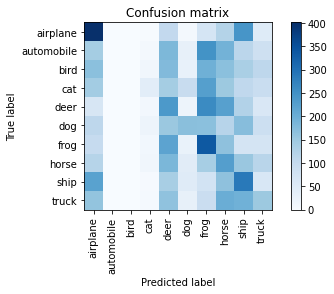

              precision    recall  f1-score   support

           0       0.25      0.40      0.31      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.32      0.04      0.07      1000
           4       0.14      0.24      0.18      1000
           5       0.34      0.17      0.23      1000
           6       0.19      0.34      0.24      1000
           7       0.13      0.23      0.17      1000
           8       0.18      0.29      0.22      1000
           9       0.17      0.15      0.16      1000

    accuracy                           0.19     10000
   macro avg       0.17      0.19      0.16     10000
weighted avg       0.17      0.19      0.16     10000



In [56]:
# SVM report and analysis
y_pred_svc = svc1.predict(X_test_m)
svc_f1 = metrics.f1_score(y_test, y_pred_svc, average= "weighted")
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
svc_cm = metrics.confusion_matrix(y_test, y_pred_svc)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Confusion matrix: \n", svc_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc))

-----------------RandomForest Report---------------
F1 score: 0.1775792594207797
Accuracy score: 0.18
Confusion matrix: 
 [[346  74  82  40  86  42  63  75 135  57]
 [118 122 105  81 116  67 115  92  78 106]
 [121  94  94  79 129  77 116  97  91 102]
 [ 79  91  78 174  78 153  85  71  83 108]
 [ 99  97  93  61 167  64 152 122  79  66]
 [ 75  90  60 138  57 256  95  63  74  92]
 [ 63 130  95  88 150  71 173  84  54  92]
 [ 93  99  72  99 114  94  87 140  86 116]
 [196  74  69  79  76  85  68  84 166 103]
 [ 78 119  79  99  85  86  78 108 106 162]]
Plotting confusion matrix


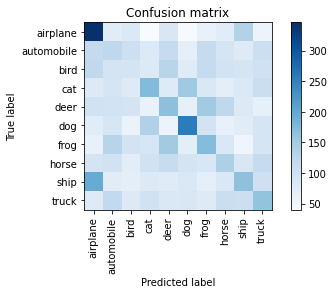

              precision    recall  f1-score   support

           0       0.27      0.35      0.31      1000
           1       0.12      0.12      0.12      1000
           2       0.11      0.09      0.10      1000
           3       0.19      0.17      0.18      1000
           4       0.16      0.17      0.16      1000
           5       0.26      0.26      0.26      1000
           6       0.17      0.17      0.17      1000
           7       0.15      0.14      0.14      1000
           8       0.17      0.17      0.17      1000
           9       0.16      0.16      0.16      1000

    accuracy                           0.18     10000
   macro avg       0.18      0.18      0.18     10000
weighted avg       0.18      0.18      0.18     10000



In [57]:
# RandomForest report and analysis
y_pred_forest = forest1.predict(X_test_m)
forest_f1 = metrics.f1_score(y_test, y_pred_forest, average= "weighted")
forest_accuracy = metrics.accuracy_score(y_test, y_pred_forest)
forest_cm = metrics.confusion_matrix(y_test, y_pred_forest)
print("-----------------RandomForest Report---------------")
print("F1 score: {}".format(forest_f1))
print("Accuracy score: {}".format(forest_accuracy))
print("Confusion matrix: \n", forest_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(forest_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_forest))

-----------------KNN Report---------------
F1 score: 0.16666178352996658
Accuracy score: 0.1731
Confusion matrix: 
 [[405  98  90  41  75  43  55  51 105  37]
 [151 205 116  85 114  57 103  52  59  58]
 [171 165 128  88 121  49  90  70  73  45]
 [124 155  83 172  96 112  85  54  54  65]
 [131 154 121  66 175  51 117  80  68  37]
 [110 139  75 139  74 196  69  60  88  50]
 [113 197 123  83 123  64 146  68  37  46]
 [147 152 114  82 128  76  62 101  76  62]
 [261 130  98  69  90  76  49  47 116  64]
 [155 169  99 105  84  66  77  85  73  87]]
Plotting confusion matrix


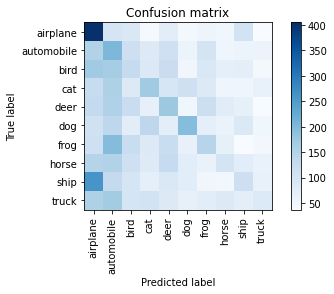

              precision    recall  f1-score   support

           0       0.23      0.41      0.29      1000
           1       0.13      0.20      0.16      1000
           2       0.12      0.13      0.13      1000
           3       0.18      0.17      0.18      1000
           4       0.16      0.17      0.17      1000
           5       0.25      0.20      0.22      1000
           6       0.17      0.15      0.16      1000
           7       0.15      0.10      0.12      1000
           8       0.15      0.12      0.13      1000
           9       0.16      0.09      0.11      1000

    accuracy                           0.17     10000
   macro avg       0.17      0.17      0.17     10000
weighted avg       0.17      0.17      0.17     10000



In [58]:
# KNN report and analysis
y_pred_knn = knn3.predict(X_test_m)
knn_f1 = metrics.f1_score(y_test, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
print("-----------------KNN Report---------------")
print("F1 score: {}".format(knn_f1))
print("Accuracy score: {}".format(knn_accuracy))
print("Confusion matrix: \n", knn_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_knn))

-----------------DecisionTree Report---------------
F1 score: 0.1436535192260735
Accuracy score: 0.1436
Confusion matrix: 
 [[207 101  86  71 111  57  73  79 138  77]
 [101 124 109  97 104  70 103  92  90 110]
 [ 97 109 114  88 115  72 107  94  92 112]
 [ 83  95 107 149  80 133  89  86  81  97]
 [103 115  87  78 140  70 127  86 100  94]
 [ 67 100  78 146  78 172  76  80  90 113]
 [ 73 119 104  91 127  94 140  92  67  93]
 [ 82 113  83  79 108  85 108 117 114 111]
 [133  85  99  99  83  81  83  93 140 104]
 [ 82 116 102 111  90  92  71 111  92 133]]
Plotting confusion matrix


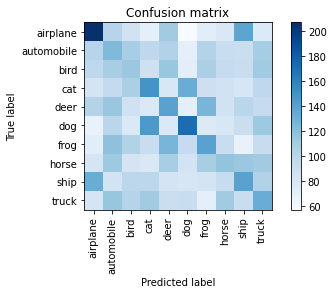

              precision    recall  f1-score   support

           0       0.20      0.21      0.20      1000
           1       0.12      0.12      0.12      1000
           2       0.12      0.11      0.12      1000
           3       0.15      0.15      0.15      1000
           4       0.14      0.14      0.14      1000
           5       0.19      0.17      0.18      1000
           6       0.14      0.14      0.14      1000
           7       0.13      0.12      0.12      1000
           8       0.14      0.14      0.14      1000
           9       0.13      0.13      0.13      1000

    accuracy                           0.14     10000
   macro avg       0.14      0.14      0.14     10000
weighted avg       0.14      0.14      0.14     10000



In [59]:
# DecisionTree report and analysis
y_pred_tree = tree3.predict(X_test_m)
tree_f1 = metrics.f1_score(y_test, y_pred_tree, average= "weighted")
tree_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
tree_cm = metrics.confusion_matrix(y_test, y_pred_tree)
print("-----------------DecisionTree Report---------------")
print("F1 score: {}".format(tree_f1))
print("Accuracy score: {}".format(tree_accuracy))
print("Confusion matrix: \n", tree_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(tree_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_tree))

In [65]:
scores = [cnn_accuracy, svc_accuracy, forest_accuracy, knn_accuracy, tree_accuracy]
models = ["CNN", "SVC", "RandomForest", "Knn", "DecisionTree"]
print(scores)
print(models)

[0.6545, 0.1853, 0.18, 0.1731, 0.1436]
['CNN', 'SVC', 'RandomForest', 'Knn', 'DecisionTree']


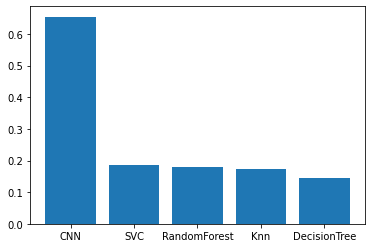

In [71]:
plt.bar(models, scores)
plt.show()

From the previous graph, it is clear that the normal models fail to grasp the complexity of the data resulting in poor performance.
on the other hand a normal CNN performs well on the test data without a lot of fine tuning, maiking it a good place to start with.